# Quick Sort

## Author: Timothy Proffitt

## CS 2500 (Algorithms) @ Missouri S&T

## Prerequisite Packages

We will use the numpy and matplotlib library in this notebook

In [10]:
# Install all the prerequisite packages from the Terminal
!pip install numpy
!pip install matplotlib

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt
import copy

# Quick Sort  

Quick Sort is a recursive function that calls Partition to split the array in two

In [18]:
def Partition(A, p,r):
  x = A[r]
  i = p - 1
  for j in range(p, r):
    if A[j] <= x:
      i = i + 1
      A[i], A[j] = A[j], A[i]
  A[i + 1], A[r] = A[r], A[i + 1]
  return i + 1


def QuickSort(A, p, r):
  if p < r:
    q = Partition(A, p, r)
    QuickSort(A ,p, q-1)
    QuickSort(A, q+1, r)

# Test 

We're testing for correctness using a test input.

In [19]:
list = [1,5,2,3,0,2,2,1,4,5]
print(f'Unsorted: {list}')
QuickSort(list, 0, len(list) -1)
print(f'Sorted: {list}')

Unsorted: [1, 5, 2, 3, 0, 2, 2, 1, 4, 5]
Sorted: [0, 1, 1, 2, 2, 2, 3, 4, 5, 5]


# Plotting Run-Time Complexity

In [20]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [25]:
 # Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        start = time.time()                               # Record state time
        QuickSort(array, 0, len(array) -1)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

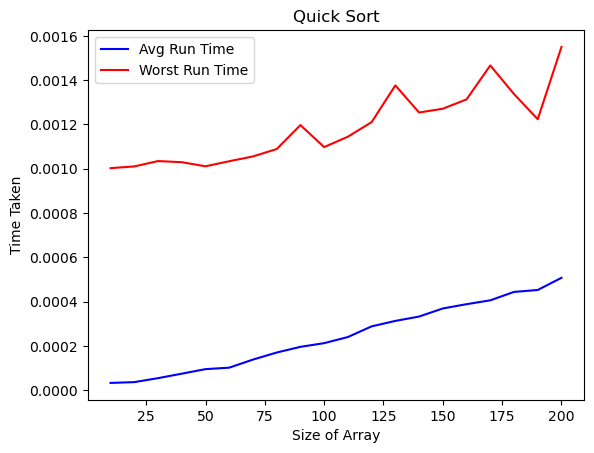

In [27]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Quick Sort") 

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()